In [1]:
import sys
sys.path.append("..")

In [2]:
from squlearn.encoding_circuit.encoding_circuit_derivatives import *

import numpy as np
from scipy.integrate import odeint
from solvers.MMR.kernel_solver import Solver
from solvers.MMR.PQK_solver import PQK_solver
from solvers.MMR.FQK_solver import FQK_solver
from DE_Library.diferential_equation_functionals import *

from utils.rbf_kernel_tools import *
from circuits.circuits import *
import pandas as pd


import matplotlib.pyplot as plt

To run this notebook it is necessary to have installed my branch of squlearn installed

In [3]:

def loss_harmonic_oscillator(f_alpha_tensor):
    """
    L_functional = dfdx2 + f
    """
    x, f, dfdx, dfdxdx = f_alpha_tensor

    return dfdxdx + f

def grad_loss_harmonic_oscillator(f_alpha_tensor):
    """
    n = x_span.shape[0] number of points
    m = x_span.shape[1] number of dimensions (typically m=1)

    F[x, x_, x__] = F(x, x_, x__)

    grad_envelope = (F(x, x_, x__)dx, F(x, x_, x__)dx_, F(x, x_, x__)dx__)

    """
    x, f, dfdx, dfdxdx = f_alpha_tensor
    return [1, 0, 1]
    

def derivatives_loss_harmonic_oscillator(f_alpha_tensor, x_span):
    """
    L_functional = dfdx - g(f(x), x)
    """
    f = f_alpha_tensor[0]
    dfdx = f_alpha_tensor[1]
    return [dfdx, -f]

In [4]:
x_line = np.linspace(0, 3.14*2, 40)
f_initial = [1, 0]

RBF_kernel_list = [rbf_kernel_manual(x_line, x_line, sigma = 2.5), analytical_derivative_rbf_kernel(x_line, x_line, sigma = 2.5), analytical_derivative_rbf_kernel_2(x_line, x_line, sigma = 2.5)]
Solver_test = Solver(RBF_kernel_list, regularization_parameter=1)
solution_RBF, loss_by_iteration_RBF = Solver_test.solver(x_line, f_initial, L_functional = loss_harmonic_oscillator)
f_RBF, optimal_alpha_RBF = solution_RBF 


-0.0
0.02571071443274916
0.05110242580896236
0.07586271863616649
0.09969216236164692
0.12231033542140773
0.14346130660505982
0.1629184242704588
0.18048828905337963
0.19601381493751574
0.20937631560299577
0.22049658648361556
0.229334986531496
0.23589055595062647
0.24019923586060238
0.2423312818939383
0.24238798522837599
0.24049783086549467
0.23681223370600119
0.2315009980238214
0.22474764544582831
0.2167447508766411
0.20768941554506543
0.19777899222757983
0.1872071605759337
0.17616043125644776
0.16481513723041824
0.1533349498714375
0.1418689375605856
0.1305501656562424
0.11949481990667372
0.10880182092265239
0.09855288556631507
0.08881298220467494
0.07963112074507098
0.07104141511337321
0.0630643551460248
0.055708226452428754
0.048970620313460875
0.04283998072776144
-0.02571071443274916
-0.0
0.02571071443274916
0.05110242580896236
0.07586271863616649
0.09969216236164692
0.12231033542140773
0.14346130660505985
0.1629184242704588
0.18048828905337963
0.19601381493751574
0.2093763156029958


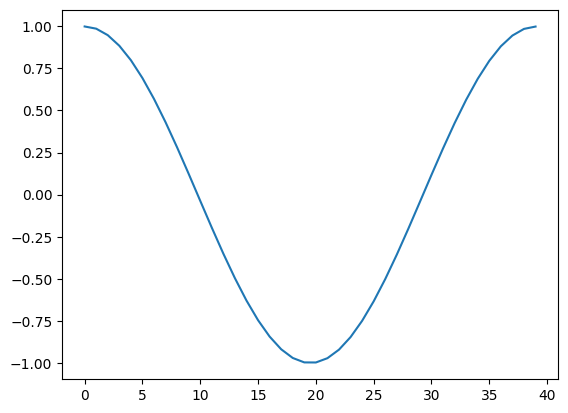

In [5]:
plt.plot(f_RBF)

In [6]:
x_line = np.linspace(0, 3.14*2, 40)
f_initial = [1, 0]


#Exact result
f_exact = np.cos(x_line)
#Numerical result
f_odeint = odeint(derivatives_loss_harmonic_oscillator, f_initial, x_line[:])[:,0].flatten()


#Classical Solver
#RBF
RBF_kernel_list = [rbf_kernel_manual(x_line, x_line, sigma = 2.5), analytical_derivative_rbf_kernel(x_line, x_line, sigma = 2.5), analytical_derivative_rbf_kernel_2(x_line, x_line, sigma = 2.5)]
Solver_test = Solver(RBF_kernel_list, regularization_parameter=1)
solution_RBF, loss_by_iteration_RBF = Solver_test.solver(x_line, f_initial, L_functional = loss_harmonic_oscillator)
f_RBF, optimal_alpha_RBF = solution_RBF 




#Quantum Solvers
#PQK
sigma_list = np.linspace(0.1, 1, 70)
mse_list = np.zeros_like(sigma_list)
sigma = 1.5


PQK_solver_test = PQK_solver({"encoding_circuit": Separable_rx_qiskit, 
                            "num_qubits": 8,
                            "num_layers": 2,
                            },
                            Executor("pennylane"), 
                            envelope={"function": rbf_kernel_manual, 
                                        "derivative_function": analytical_derivative_rbf_kernel, 
                                        "second_derivative_function": analytical_derivative_rbf_kernel_2,
                                        "sigma": sigma})


#solution_PQK, loss_by_iteration_PQK = PQK_solver_test.solver(x_line, f_initial, L_functional = loss_harmonic_oscillator)
#f_PQK, optimal_alpha_PQK = solution_PQK

#FQK
FQK_solver_test = FQK_solver({"encoding_circuit": HardwareEfficientEmbeddingCircuit_qiskit, 
                              "num_qubits": 3, #7
                              "num_layers": 1,
                              },
                              Executor("pennylane"),)
solution_FQK, loss_by_iteration_FQK = FQK_solver_test.solver(x_line, f_initial, loss_harmonic_oscillator)
f_FQK, optimal_alpha_FQK = solution_FQK

-0.0
0.02571071443274916
0.05110242580896236
0.07586271863616649
0.09969216236164692
0.12231033542140773
0.14346130660505982
0.1629184242704588
0.18048828905337963
0.19601381493751574
0.20937631560299577
0.22049658648361556
0.229334986531496
0.23589055595062647
0.24019923586060238
0.2423312818939383
0.24238798522837599
0.24049783086549467
0.23681223370600119
0.2315009980238214
0.22474764544582831
0.2167447508766411
0.20768941554506543
0.19777899222757983
0.1872071605759337
0.17616043125644776
0.16481513723041824
0.1533349498714375
0.1418689375605856
0.1305501656562424
0.11949481990667372
0.10880182092265239
0.09855288556631507
0.08881298220467494
0.07963112074507098
0.07104141511337321
0.0630643551460248
0.055708226452428754
0.048970620313460875
0.04283998072776144
-0.02571071443274916
-0.0
0.02571071443274916
0.05110242580896236
0.07586271863616649
0.09969216236164692
0.12231033542140773
0.14346130660505985
0.1629184242704588
0.18048828905337963
0.19601381493751574
0.2093763156029958


In [7]:
def get_full_loss(functional_loss_by_iteration, y_exact):
    return np.mean((np.array(functional_loss_by_iteration)-y_exact)**2, axis = 1)

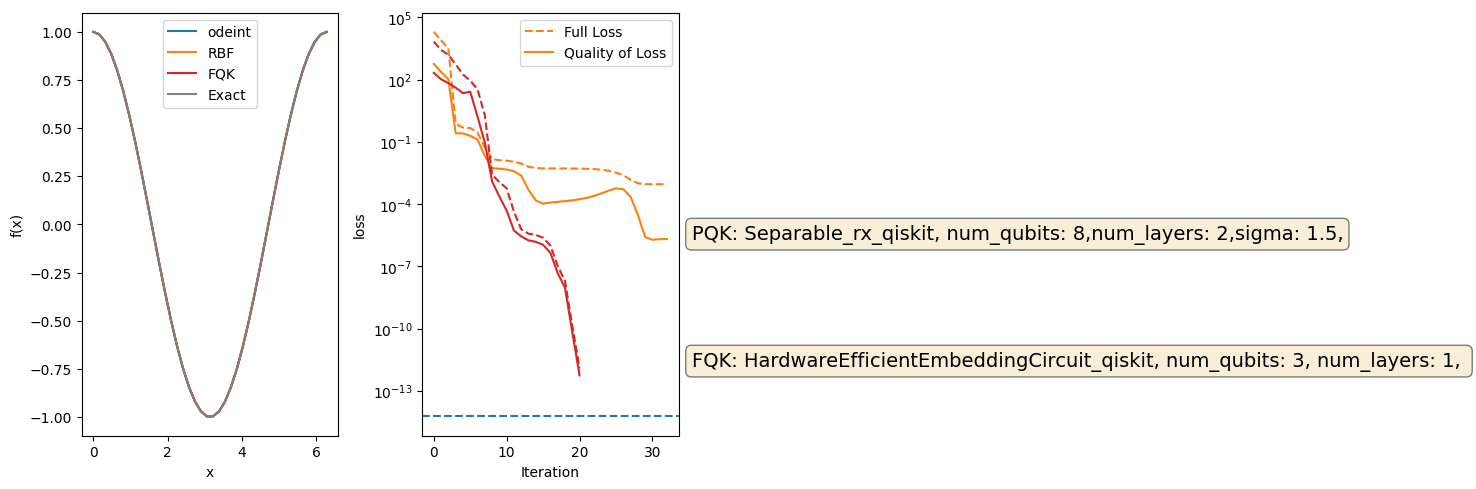

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


x_span_plot = x_line.reshape(-1, 1)
ax1.plot(x_span_plot, f_odeint,label="odeint", color="C0")
ax1.plot(x_span_plot, f_RBF,  label="RBF", color="C1")
#ax1.plot(x_span_plot, f_PQK, label="PQK", color="C2")
ax1.plot(x_span_plot, f_FQK, label="FQK", color="C3")
ax1.plot(x_span_plot, f_exact, label="Exact", color="gray")


ax1.set_ylabel("f(x)")
ax1.set_xlabel("x")
ax1.legend()

str_PQK_info = PQK_solver_test.print_plotting_relevant_info()
str_FQK_info = FQK_solver_test.print_plotting_relevant_info()

#ax2 is for the errors
ax2.plot(loss_by_iteration_RBF[0], color="C1", linestyle="--", label="Full Loss")
ax2.plot(get_full_loss(loss_by_iteration_RBF[1], f_exact), color="C1", label="Quality of Loss")

#ax2.plot(loss_by_iteration_PQK[0], color="C2", linestyle="--",)
#ax2.plot(get_full_loss(loss_by_iteration_PQK[1], f_exact), color="C2", )

ax2.plot(loss_by_iteration_FQK[0], color="C3", linestyle="--", )
ax2.plot(get_full_loss(loss_by_iteration_FQK[1], f_exact), color="C3", )

ax2.axhline(np.mean((f_odeint-f_exact)**2), color="C0", linestyle="--")

ax2.set_yscale("log")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("loss")

ax2.legend()


#add a txt box with the relevant info to the right of the plot
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax2.text(1.05, 0.5, str_PQK_info, transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax2.text(1.05, 0.2, str_FQK_info, transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()


In [15]:
from squlearn.observables import SummedPaulis
from squlearn.qnn import QNNRegressor
from squlearn.qnn.lowlevel_qnn import LowLevelQNN
from squlearn.optimizers import SLSQP, Adam
from squlearn.qnn.loss import *
from squlearn.qnn.training import *
#from DE_Library.qnn_and_kernels_wrappers import ODELoss_wrapper
from DE_Library.diferential_equation_functionals import ODELoss_wrapper



num_qubits = 1
num_features = 1
num_layers = 3
circuit = SimpleAnalyticalCircuit(num_qubits, num_features, num_layers)
executor = Executor("pennylane")

Observables = SummedPaulis(num_qubits, include_identity=False)                                                      
param_obs = Observables.generate_initial_parameters(seed=1)
#param_ini = params_ini_for_qnn_log
param_ini = circuit.generate_initial_parameters(seed=1)


maxiter = 50

slsqp = SLSQP(options={"maxiter": 150, "ftol": 0.05})
log_file = "logarithm_DE.log"
adam = Adam(options={"maxiter": maxiter, "tol": 0.00009, "log_file": log_file })

initial_value = np.array([1, 0])
loss_ODE = ODELoss_wrapper(loss_harmonic_oscillator, grad_loss_harmonic_oscillator, initial_vec = initial_value, eta=1)


clf = QNNRegressor(
    circuit,
    Observables,
    executor,
    loss_ODE,
    adam,
    param_ini,
    param_obs,
    opt_param_op = False, #Parametrized Observables not benchmarked yet
)

In [16]:
y_ODE = np.zeros((x_line.shape[0]))
clf._fit(x_line, y_ODE,  weights=None)
f_QNN = clf.predict(x_line)


PARAM [-0.52136612  1.38433962 -3.14087402]
INPUT [0.         0.16102564 0.32205128 0.48307692 0.64410256 0.80512821
 0.96615385 1.12717949 1.28820513 1.44923077 1.61025641 1.77128205
 1.93230769 2.09333333 2.25435897 2.41538462 2.57641026 2.7374359
 2.89846154 3.05948718 3.22051282 3.38153846 3.5425641  3.70358974
 3.86461538 4.02564103 4.18666667 4.34769231 4.50871795 4.66974359
 4.83076923 4.99179487 5.15282051 5.31384615 5.47487179 5.63589744
 5.79692308 5.95794872 6.11897436 6.28      ]
LOSS [3.29926994]
fit:  18%|█▊        | 9/50 [00:57<04:22,  6.40s/it]
using this
NUMERICAL GRAD [-1.52049928 -1.52049928 -1.52049706]
GRAD and sum [-1.52049256 -1.52049256 -1.52049256] -4.561477684419099
DIFF 1.0515846603686817e-05

PARAM [-0.47136612  1.43433962 -3.09087402]
INPUT [0.         0.16102564 0.32205128 0.48307692 0.64410256 0.80512821
 0.96615385 1.12717949 1.28820513 1.44923077 1.61025641 1.77128205
 1.93230769 2.09333333 2.25435897 2.41538462 2.57641026 2.7374359
 2.89846154 3.05948

In [18]:
loss_qnn_df = pd.read_csv(log_file, delim_whitespace=True)

In [19]:
loss_qnn_df

,Iteration,f(x),Gradient,Step,Eff.,LR,LR.1
0,1,3.29927,2.63357,0.08660,0.05000,0.05,NaN
1,2,3.05746,2.94029,0.11677,0.03712,0.05,NaN
2,3,2.69490,3.24828,0.10141,0.03180,0.05,NaN
3,4,2.35649,3.40863,0.09593,0.02886,0.05,NaN
4,5,2.02609,3.46381,0.09318,0.02703,0.05,NaN
5,6,1.70439,3.42605,0.09150,0.02581,0.05,NaN
6,7,1.39592,3.30231,0.09026,0.02498,0.05,NaN
7,8,1.10643,3.09913,0.08912,0.02440,0.05,NaN
8,9,0.84196,2.82432,0.08786,0.02400,0.05,NaN
9,10,0.60815,2.48762,0.08629,0.02374,0.05,NaN


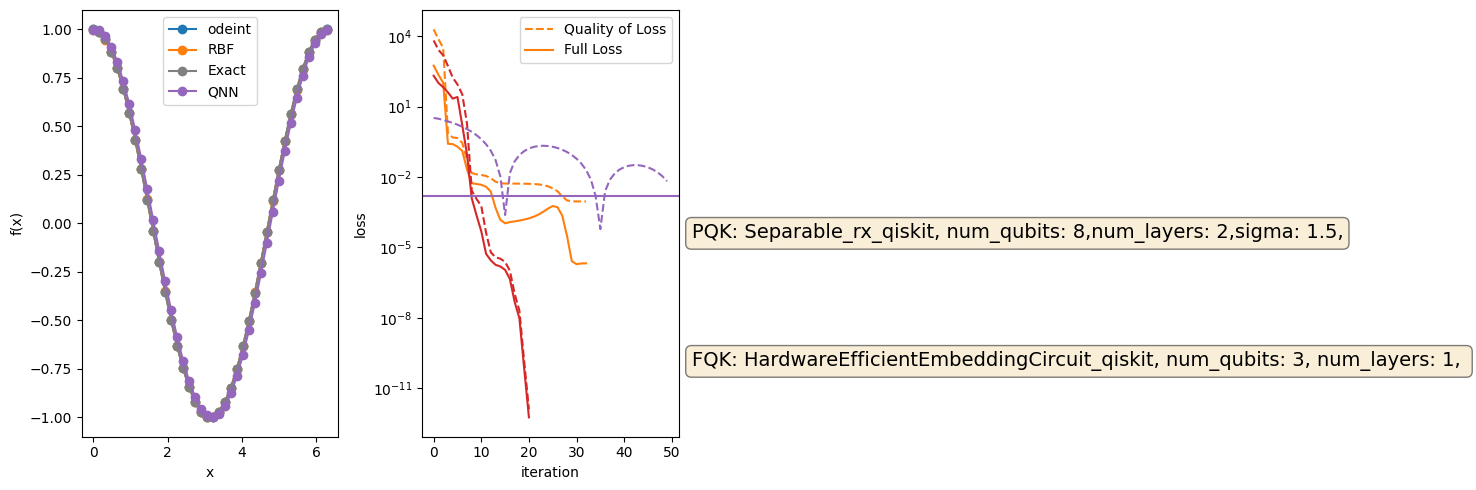

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


x_span_plot = x_line.reshape(-1, 1)
ax1.plot(x_span_plot, f_odeint,"-o", label="odeint", color="C0")
ax1.plot(x_span_plot, f_RBF, "-o", label="RBF", color="C1")
#ax1.plot(x_span_plot, f_PQK, "-o", label="PQK", color="C2")
#ax1.plot(x_span_plot, f_FQK, "-o", label="FQK", color="C3")
ax1.plot(x_span_plot, np.cos(x_span_plot),  "-o", label="Exact", color="gray")
ax1.plot(x_span_plot, f_QNN, "-o", label="QNN", color="C4")
#plt.ylim(-3, 3)


ax1.set_ylabel("f(x)")
ax1.set_xlabel("x")
ax1.legend()

str_PQK_info = PQK_solver_test.print_plotting_relevant_info()
str_FQK_info = FQK_solver_test.print_plotting_relevant_info()

#ax2 is for the errors
ax2.plot(loss_by_iteration_RBF[0], color="C1", linestyle="--", label="Quality of Loss")
ax2.plot(get_full_loss(loss_by_iteration_RBF[1], f_exact),  color="C1", label="Full Loss")

#ax2.plot(loss_by_iteration_PQK[0], color="C2", linestyle="--",)
#ax2.plot(get_full_loss(loss_by_iteration_PQK[1], f_exact), color="C2", )

ax2.plot(loss_by_iteration_FQK[0], color="C3", linestyle="--", )
ax2.plot(get_full_loss(loss_by_iteration_FQK[1], f_exact), color="C3", )

if len(loss_qnn_df["f(x)"]) >= 5: #If 
        ax2.plot(loss_qnn_df["f(x)"], color="C4", linestyle="--", )
else:
        ax2.axhline(loss_qnn_df["f(x)"].iloc[-1], color="C4", linestyle="--", ) #Quality of Loss in QNN

ax2.axhline(np.mean((f_QNN.flatten()-f_exact)**2), color="C4", linestyle="-")



ax2.set_ylabel("loss")
ax2.set_xlabel("iteration")
ax2.set_yscale("log")
ax2.legend()

#add a txt box with the relevant info to the right of the plot
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax2.text(1.05, 0.5, str_PQK_info, transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax2.text(1.05, 0.2, str_FQK_info, transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()
